# Dijkstra 

### Librerias Necesarias

In [ ]:
pip install heapq

In [ ]:
pip install networkx

In [4]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

Distancia mas corta desde el nodo 0
Nodo: 0, distancia: 0
Nodo: 1, distancia: 2
Nodo: 2, distancia: 6
Nodo: 3, distancia: 7
Nodo: 4, distancia: 17
Nodo: 5, distancia: 22
Nodo: 6, distancia: 19


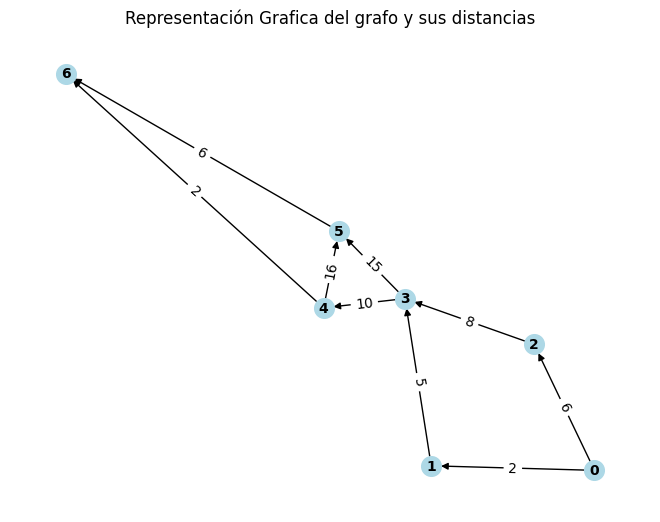

In [21]:
def dijkstra(grafo, nodo_origen):
    # inicializar las distancias mas cortasa infinito
    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[nodo_origen] = 0 # se le indica a la distancia al nodo origen es de 0

    # cola para determinar la explotacion de nodos
    cola_prioridad = [(0, nodo_origen)]

    # Mientras haya nodos, va a explorar 
    while cola_prioridad:
        # Obtención del nodo con menor distancia, como primera vez sabemos que es 0
        distancias_actual, nodo_actual = heapq.heappop(cola_prioridad)
        
        # Si la distancia actual es mayor a la registrada, continue
        if distancias_actual > distancias[nodo_actual]:
            continue

        # Explorar los vecinos del nodo actual (cercanos)
        for vecino, peso in grafo[nodo_actual].items():
            #calcular la distancia al vecino a traves del nodo actual
            nueva_distancia = distancias_actual + peso

            # si la nueva distancia es menor que la registrada, actualizar
            if nueva_distancia < distancias[vecino]:
                distancias[vecino] = nueva_distancia
                # Agregar al vecino a la cola de prioridad 
                heapq.heappush(cola_prioridad, (nueva_distancia, vecino))
    return distancias

def graficar_grafo(grafo): 
    # Instancia de la clase para graficar nodos
    Grafox = nx.DiGraph()

    # Añadir los nodos y las aristas com pesos
    for nodo, vecinos in grafo.items():
        for vecino, pesos in vecinos.items():
            Grafox.add_edge(nodo, vecino, weight=pesos)

    # Obtener las posiciones para la grafica
    pos = nx.spring_layout(Grafox)

    # Dibujar los nodos y las etiquetas
    nx.draw(Grafox, pos, with_labels = True, node_color = 'lightblue', node_size = 200,
            font_size = 10, font_weight = 'bold')
    
    # Dibujar las etiquetas de las aristas (pesos)
    labels = nx.get_edge_attributes(Grafox, 'weight')
    nx.draw_networkx_edge_labels(Grafox, pos, edge_labels=labels, font_size=10)
    
    # Mostrar la grafica
    plt.title("Representación Grafica del grafo y sus distancias")
    plt.show()

grafo = {
    '0':{'1': 2, '2': 6},
    '1':{'3': 5},
    '2':{'3': 8},
    '3':{'5': 15, '4':10},
    '4':{'5': 16, '6': 2},
    '5':{'6': 6},
    '6': {},
}

# Ejecución del alg Dijkstra
resultado = dijkstra(grafo,'0')
# Recorrido de la lista resultados
print("Distancia mas corta desde el nodo 0")
for nodo, distancia in resultado.items():
    print (f"Nodo: {nodo}, distancia: {distancia}" )

# Grafica
graficar_grafo(grafo)



